In [31]:
import numpy as np
import matplotlib.pyplot as plt

O problema de valor inicial dados é:
\begin{align*}
    y' = -500\,y + 1000\,sin(t) + 250, y(0) = 0,5
\end{align*}
Observando a forma da EDO, o termo $-500y$, que representa uma taxa de consumo muito rápida, indica que a solução possui uma componente que decai muito rapidamente. Por outro lado, temos o termo $1000\,sin(t)$ que indica que a solução possui uma componente de variação lenta. Portanto, o problema é classificado como stiff.

In [32]:
# Definição da função f(t, y) = y'
def f(t, y):
    dydt = -500*y + 1000*np.sin(t) + 250
    return dydt

Implementação do método BDF2 (Backward Differentiation Formula) de ordem 2

In [33]:
def bdf2(t_0, t_f, y0, h):
    num_passos = int((t_f - t_0) / h)
    t_vet = np.linspace(t_0, t_f, num_passos + 1) # vetor temporal
    y_vet = np.zeros(num_passos + 1) # valores de y
    y_vet[0] = y0

    # Calculando y1 usando o método de Euler implícito
    # y_1 = (y_0 + h * (1000 * sin(t_1) + 250)) / (1 + 500 * h)
    y_vet[1] = (y_vet[0] + h * (1000 * np.sin(t_vet[1]) + 250)) / (1 + 500 * h)

    # Aplicando BDF2
    for n in range(num_passos - 1): # n vai de 0 a (num_passos - 2) para calcular de y2 até y_convergido
        t_prox = t_vet[n+2]
        a = (4/3) * y_vet[n+1] - (1/3) * y_vet[n] + (2/3) * h * (1000 * np.sin(t_prox) + 250)
        b = 1 + (1000/3) * h
        y_vet[n+2] = a / b

    return t_vet, y_vet

Implementação do método de Runge-Kutta de 4ª ordem.

In [34]:
def rk4(t_0, t_f, y0, h):
    num_passos = int((t_f - t_0) / h)
    t_vet = np.linspace(t_0, t_f, num_passos + 1)
    y_vet = np.zeros(num_passos + 1)
    y_vet[0] = y0

    for i in range(num_passos):
        k1 = f(t_vet[i], y_vet[i])
        k2 = f(t_vet[i] + h/2, y_vet[i] + h/2 * k1)
        k3 = f(t_vet[i] + h/2, y_vet[i] + h/2 * k2)
        k4 = f(t_vet[i] + h, y_vet[i] + h * k3)
        y_vet[i+1] = y_vet[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return t_vet, y_vet

In [35]:
t_0 = 0.0 # Tempo inicial
t_f = 0.1 # Tempo final
y0 = 0.5
h = 0.001  # Tamanho do passo

Resolvendo numericamente o problema no intervalo $t \in [0, 0.1]$ utilizando o método BDF (Backward Differentiation Formula)

In [36]:
# Resolver usando BDF2
t_bdf2, y_bdf2 = bdf2(t_0, t_f, y0, h)

Apresentando o gráfico da solução $y(t)$ no intervalo $[0, 0.1]$.

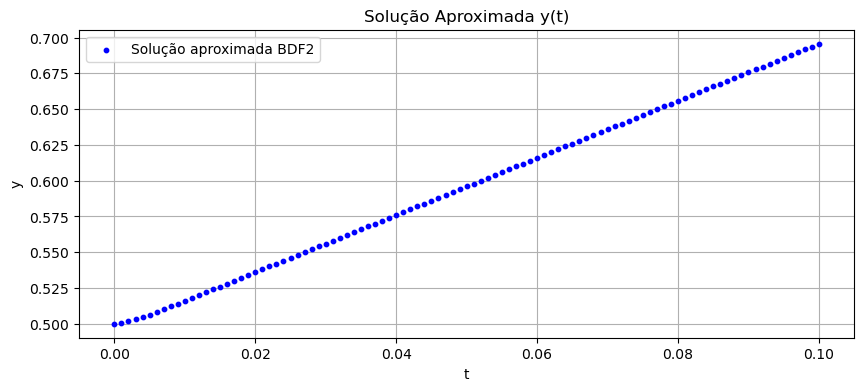

In [37]:
plt.figure(figsize=(10, 4))
# Plotando Solução aproximada
plt.scatter(t_bdf2, y_bdf2, label='Solução aproximada BDF2', color='blue', marker='o', s=10, zorder=3)
plt.title("Solução Aproximada y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [38]:
t_rk4, y_rk4 = rk4(t_0, t_f, y0, h)

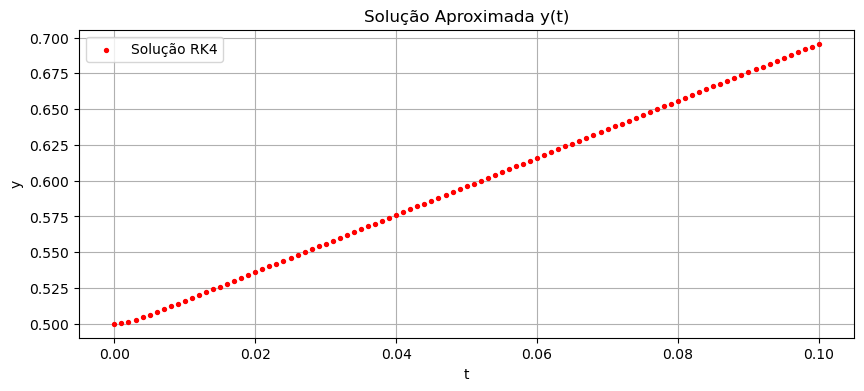

In [39]:
plt.figure(figsize=(10, 4))
# Plotando Solução aproximada
t_l = np.linspace(0, 0.1, 100)
plt.scatter(t_rk4, y_rk4, label='Solução RK4', color='red', marker='o', s=8, zorder=3)
plt.title("Solução Aproximada y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

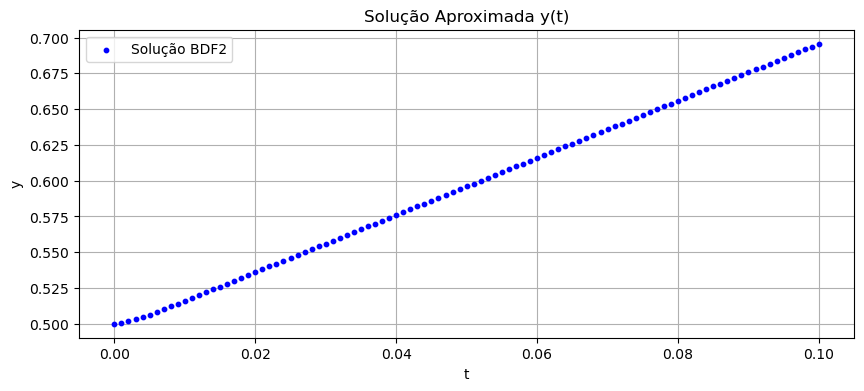

In [ ]:
plt.figure(figsize=(10, 4))
# Plotando Solução aproximada
t_l = np.linspace(0, 0.1, 100)
plt.scatter(t_bdf2, y_bdf2, label='Solução BDF2', color='blue', marker='o', s=10, zorder=3)
plt.title("Solução Aproximada y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

Para este problema rígido em específico, considerando um mesmo passo $h = 0.001$, o gráfico anterior nos mostra que o Método de Runge-Kutta de 4ª ordem manteve-se estável e apresentou uma solução semelhante àquela obtida pelo método BDF2, ainda que RK4 não seja adequado para tratar de problemas Stiff. Isso se deve ao fato que o passo escolhido foi suficientemente pequeno para que houvesse a estabilidade além de que a EDO em questão é linear. Se o passo fosse maior, a solução iria divergir e explode rapidamente,apresentando uma solução diferente da obtida pelo método BDF2, que se mostrou estável. De fato, na tentativa de obter uma solução estável com o método RK4, é necessário utilizar passos de tempo muito pequenos, o que torna a simulação ineficiente ou mesmo inviável em casos complexos.